# Boston Dataset Analysis

## General Description

The below code shows descriptive analysis of a quantitative data set. In this case, and in order to show some of the capabilities of Python regarding statistical analysis, data involved in this assessment is related to house prices in Boston.
As usual, and as a general advice for any analytical work, the first step is to obtain the data set and have a very basic representation of the data to assess, from a high-level perspective, the attributes and characteristics, as well as aspects such as the number of variables, their ranges and, in sum, a general description.

In [12]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

# Read data from file 'boston.csv' 
data = pd.read_csv("data\\boston.csv") 

data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Once the data set has been printed, main characteristics may be extracted. For instance:
- This data set has 14 variables
- There are 506 records
- All values in each column are numerical

Further information can be obtained with summary statistics:

In [13]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Mean, Standars deviation, quartile, min and max are summarised in the above table.

When researching about this particular dataset, further information can be obtained regarding the columns and their meaning. In fact, depending on the site where this data set is obtained, some of the CSV files contain this extra piece of information. For this particular project the decision was to use the simplest form of the data set, with no additional data and therefore, a description of the columns was obtained online. Espcifically, the below description corresponds to the embbeded information provided by the scikit-learn Boston dataset (from sklearn.datasets import load_boston):

- **CRIM**  per capita crime rate by town
- **ZN**  proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**  proportion of non-retail business acres per town
- **CHAS**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**  nitric oxides concentration (parts per 10 million)
- **RM**  average number of rooms per dwelling
- **AGE**  proportion of owner-occupied units built prior to 1940
- **DIS**  weighted distances to five Boston employment centres
- **RAD**  index of accessibility to radial highways
- **TAX**  full-value property-tax rate per \$10,000
- **PTRATIO**  pupil-teacher ratio by town
- **B**  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**  \% lower status of the population
- **MEDV**  Median value of owner-occupied homes in \$1000's

Given this wide diversity of variables, summary characteristics are also quite heteregenous. In order to attempt obtaining more information about these variables the next step is to take them in consideration one by one and plot their distribution, looking for special characteristics that could help understand their distribution and behaviour.



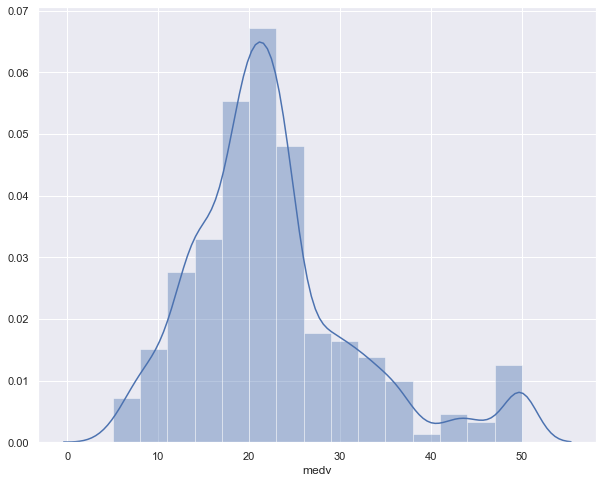

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(data['medv'], bins=15)
plt.show()

According to the above chart in which both histograms and kernel density estimation (KDE) have been included for the target variable MEDV, ie. the dependent variable, we can see that distribution of this variable is close to normal, whith a central value with higher frequencies which goes decreasing to both sides, in a gaussian fashion.

This particular frequency distribution plot applies to a continous variable, as MEDV, needs to transform it into an interval first (each of the bins included is an interval).

Besides this information we have extracted from the analysis, further observations may lead to a suspicion of the presence of outliers in the right side of the chart, corresponding to the higher values og houses. last bin on the right breaks the pattern observed in the other bins and in fact defies the normality of the shape. Further analysis is required to determine this. A fast and efficient way to do this is by plotting this variable in the form of a boxplot:

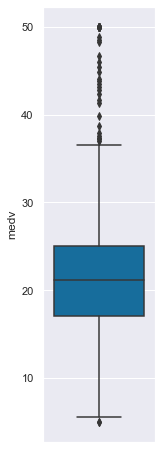

In [15]:
sns.set(rc={'figure.figsize':(2,8)})
sns.boxplot(y=medv,data=data,palette="colorblind")

As predicted by the KDE analysis, while MEDV is an overall normally distributed variable, the existence of outliers is to be noted when performing further analysis, since these records could mislead outputs when performing calculations. The decision to keep or eliminate these extreme records is something to have in consideration in further stages of this investigation.

### Inferential Analysys

Second part of this investigation is to determine if target variable (MEDV) representing the proce of houses in Boston area is determined by one particular independent variable, which in this case is CHAS, representing the presence or not of the house in the course of the Charles river.

As previously, a frist look into both variables is the first step to get deeper knowldege about them.

In [16]:
pd.value_counts(data['chas'])

0    471
1     35
Name: chas, dtype: int64

**CHAS** variable is *categorical* with two levels: 0 and 1, representing, respectively, that the house is not in the course and the opposite. 

From the dataset's pool of 506 houses, only 35 are considered to be in the river Charles course.

In order to have a closer look in the relation with our two variables, the *dependent*, or *target* variable (**MEDV**) and the *independent* or *predictor* variable (**CHAS**), we can plot both together, showing the prices of the houses separated by the fact of being in the river or not.

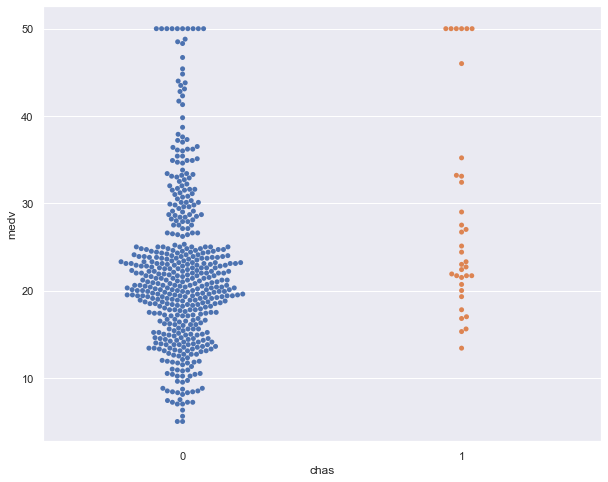

In [17]:
sns.set(rc={'figure.figsize':(10,8)})
chas=data['chas']
medv=data['medv']

sns.swarmplot(chas,medv)

In the same line, we can also plot the dispersion or normality of variable MEDV (as done in the previous section), but in this case also splitting results dbased on the binary results of variable CHAS:

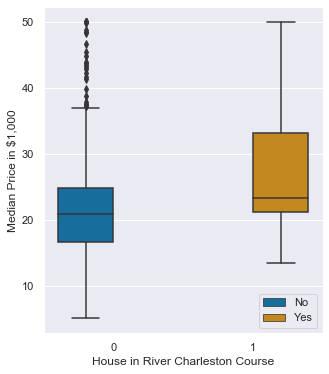

In [18]:
sns.set(rc={'figure.figsize':(5,6)})
ax=sns.boxplot(y=medv, x=chas,data=data,palette="colorblind",hue=chas)
ax.set(xlabel='House in River Charleston Course', ylabel='Median Price in $1,000')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles,['No','Yes'])


Average price when house is in the river is  28.44
Average price when house is NOT in the river is  22.09384288747346


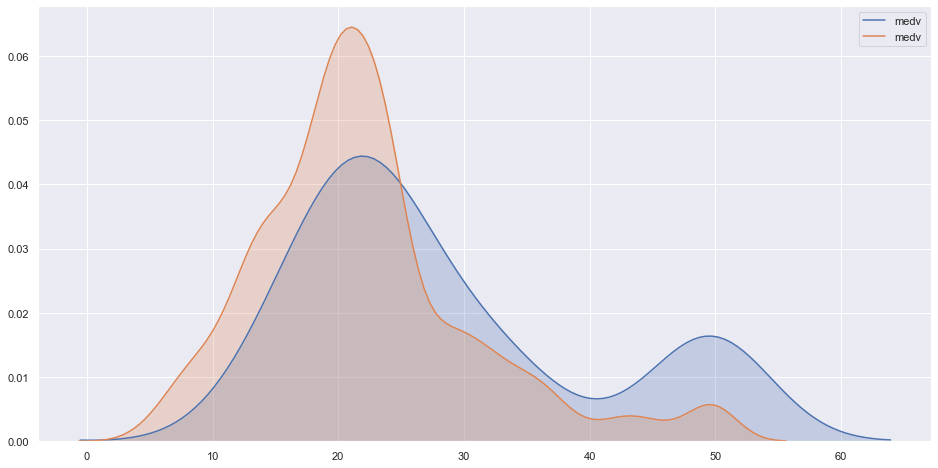

In [19]:
#Creating separate price variables depending on the river
riv=medv[chas==1]
noriv=medv[chas==0]

#Calculating the average price for each group of houses
from statistics import mean 

print ("Average price when house is in the river is ",mean(riv))
print ("Average price when house is NOT in the river is ",mean(noriv))

# Plotting price (medv) grouped by the presence of river or not (chas)
sns.set(rc={'figure.figsize':(16,8)})
sns.kdeplot(riv, shade=True)
sns.kdeplot(noriv, shade=True)


At first glance an early estimation is that, based on the average prices and the above plot, houses in the course of the river have higher average price than the others.

A second impression would be that while both groups distribution adopts similar shapes, houses with higher prices are more likely those that are in the course of the river Charles.


To summarise the results of the analysis on both variables, some of the main characteristics can be compiled as below:
-  **Dependent variable <u>Price (MEDV)</u>** is a continous variable with values ranging from 5 to 50 and is normally distributed, although some outliers can be found in the right extreme of the distribution.

-  **Predictor variable <u>River (CHAS)</u>** is a categorical variable with two levels (0 and 1, representing 'no' and 'yes', respectively).


With this information, and with the help of the [Correct Statistical Test table from UCLA](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/), the correct test to perform with these components would be a **2 independent sample t-test**

These two samples will be represented by the values of variable CHAS applied onto MEDV.

### Two Independent Sample T test

*Null hypothesis*: Price differences cannot be attributed to the river.

*Alternative hypothesis*: Price might be dependent on the fact the house is in the course of the river.

Two independet samples, comparing averages of two independent samples to determine if the null hypothesis can be rejected.


Divide sample in two sets with prices (medv) for houses which are located along the river (chas=1) and those which are not (chas=0):

In [20]:
ss.ttest_ind(riv,noriv)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Such a small p-value allows to reject the null hypothesis and therefore, to stablish that the fact that the house is in the course of the river is related to the price of the house.



In [95]:
# Calculating the correlation coeficiente between these two variables
data2=data[['chas','medv']].copy()
data2.corr()

,chas,medv
chas,1.00000,0.17526
medv,0.17526,1.00000


## Predicting house prices using a neural network model with Keras

The first approach to using a neural network to predict the median price of houses in the data set is to, efectivelly, create one and start observing its behaviour and its predictive power.

Keras is a deep learning package which works on top of TensorFlow and is used to generate neural networks and is definded in [their webpage](www.keras.io) as a 
> *high-level neural networks API, written in Python \[...\] developed with a focus on enabling fast experimentation.* 

Its basic sequential configuration, once keras has been imported, could be summarised as

1. Initialise keras by creating a neural network model 
2. Stack and define layers, including defining the number of neurons in each layer and the algorithm used to activate it<br>
3. Compile the model<br>
4. Train the model<br>
5. Evaluate results<br>
6. Use your model to make predictions<br>

With this information, the first attempt to create a neural network including 13 predictor variables and a target dependent variable (median price: MEDV) should be quite straight-forward.


In [105]:
# Slicing the dataframe into two separate subsets, one with the target (medv) and the other with the predictors.
x=data.iloc[:,0:13]
y=medv

import keras as kr

# Creating the neural network model
m = kr.models.Sequential()

# 13 initial input variables
m.add(kr.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
# An intermediate layer
m.add(kr.layers.Dense(200, activation='linear'))
# A final layer with a single output (predicted median price)
m.add(kr.layers.Dense(1, kernel_initializer='normal'))

# Compile model
m.compile(loss='mean_squared_error', optimizer='adam')


In the cell above the model has been defined. After creating two separate subsets (predictors and target), 3 layers have been added to the model. 

First layer has 13 input dimensions (the 13 columns in data set, excluding MEDV)
Second layer is 200 neurons dense
Final layer has one neuron (output)

The selection of the activation methods and the optimizer are the main features used to gauge the network general behaviour. 

According to [MarkTechPost's article regarding Keras](https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/): 
>*The optimizer is responsible for navigating the space to choose the best model parameters*

After some initial basic tests, the use of the Rectified Linear Unit (relu) activator gave higher precission in the overall results.

However, once the network is created, next step is to train it with data, defining the inputs(x), the output(y), the number of iterations (epochs) and the bacth size for each iteration:

In [89]:
# Train the model
m.fit(x,y,epochs=50, batch_size=50)

Epoch 1/50
506/506 [==============================] - 0s 36us/step - loss: 17.2422
Epoch 2/50
506/506 [==============================] - 0s 36us/step - loss: 15.6513
Epoch 3/50
506/506 [==============================] - 0s 32us/step - loss: 15.1553
Epoch 4/50
506/506 [==============================] - 0s 34us/step - loss: 14.9900
Epoch 5/50
506/506 [==============================] - 0s 38us/step - loss: 15.1327
Epoch 6/50
506/506 [==============================] - 0s 36us/step - loss: 15.1993
Epoch 7/50
506/506 [==============================] - 0s 38us/step - loss: 15.4227
Epoch 8/50
506/506 [==============================] - 0s 38us/step - loss: 15.7825
Epoch 9/50
506/506 [==============================] - 0s 36us/step - loss: 21.8341
Epoch 10/50
506/506 [==============================] - 0s 36us/step - loss: 16.7957
Epoch 11/50
506/506 [==============================] - 0s 38us/step - loss: 15.3005
Epoch 12/50
506/506 [==============================] - 0s 36us/step - loss: 14.7653
E

However, after several attempts to run this network and modifying parameters, it seems that there is no further reduction in the loss value and thus, the accuracy of the model to predict the median prices of houses is not as good as desired.

In [101]:
# calculating error
np.sqrt(np.sum((p.T-y.values)**2))

80.01926688342216

Upon further research it seems that the problem is not exactly in the neural network design, but rather in some other previous consideration that has been overlooked. As seen in the first section of this same notebook, variables in this data set are heterogeneous and have different ranges. Instead of including them as they are, some preprocessing is required in order to standarise them and thus, putting all of them in the same comparison magnitude.

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x)
# then we call the transform method to scale both the training and testing data
x_scaled = scaler.transform(x)

In [140]:
x_scaled[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [144]:
# Creating the neural network model
m = kr.models.Sequential()

# 13 initial input variables
m.add(kr.layers.Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
# An intermediate layer
m.add(kr.layers.Dense(16, activation='relu'))
# A final layer with a single output (predicted median price)
m.add(kr.layers.Dense(1, kernel_initializer='normal'))

# Compile model
#m.compile(loss='mean_squared_error', optimizer='adam')
m.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [145]:
# Train the model
m.fit(x_scaled,y,epochs=100, batch_size=50)

Epoch 1/100
506/506 [==============================] - 0s 603us/step - loss: 590.7164 - mae: 22.4972
Epoch 2/100
506/506 [==============================] - 0s 40us/step - loss: 588.7659 - mae: 22.4515
Epoch 3/100
506/506 [==============================] - 0s 42us/step - loss: 586.1401 - mae: 22.3886
Epoch 4/100
506/506 [==============================] - 0s 42us/step - loss: 582.4459 - mae: 22.3000
Epoch 5/100
506/506 [==============================] - 0s 43us/step - loss: 577.1876 - mae: 22.1773
Epoch 6/100
506/506 [==============================] - 0s 43us/step - loss: 570.0218 - mae: 22.0060
Epoch 7/100
506/506 [==============================] - 0s 42us/step - loss: 560.2991 - mae: 21.7730
Epoch 8/100
506/506 [==============================] - 0s 38us/step - loss: 547.0339 - mae: 21.4552
Epoch 9/100
506/506 [==============================] - 0s 42us/step - loss: 529.7918 - mae: 21.0371
Epoch 10/100
506/506 [==============================] - 0s 43us/step - loss: 508.0478 - mae: 20.506

506/506 [==============================] - 0s 40us/step - loss: 22.9915 - mae: 3.5599
Epoch 84/100
506/506 [==============================] - 0s 45us/step - loss: 22.8734 - mae: 3.5460
Epoch 85/100
506/506 [==============================] - 0s 43us/step - loss: 22.7685 - mae: 3.5307
Epoch 86/100
506/506 [==============================] - 0s 43us/step - loss: 22.7909 - mae: 3.5521
Epoch 87/100
506/506 [==============================] - 0s 43us/step - loss: 22.5884 - mae: 3.5448
Epoch 88/100
506/506 [==============================] - 0s 43us/step - loss: 22.5048 - mae: 3.5383
Epoch 89/100
506/506 [==============================] - 0s 42us/step - loss: 22.3754 - mae: 3.5289
Epoch 90/100
506/506 [==============================] - 0s 40us/step - loss: 22.2955 - mae: 3.5142
Epoch 91/100
506/506 [==============================] - 0s 40us/step - loss: 22.2100 - mae: 3.5043
Epoch 92/100
506/506 [==============================] - 0s 42us/step - loss: 22.1125 - mae: 3.4902
Epoch 93/100
506/506 [=

Final step is to use the model to predict the results using this neural network, which has already been trained with the data:

In [136]:
# Run each x value through the neural network
p = m.predict(x_scaled)


In [137]:
np.sqrt(np.sum((p.T-y.values)**2))

94.90485298626547

In [138]:
# calculating error
np.sqrt(np.sum((p.T-y.values)**2))

94.90485298626547

However, after several attempts to run this network and modifying parameters, it seems that there is no further reduction in the loss value and thus, the accuracy of the model to predict the median prices of houses is not as good as desired.




80.01926688342216

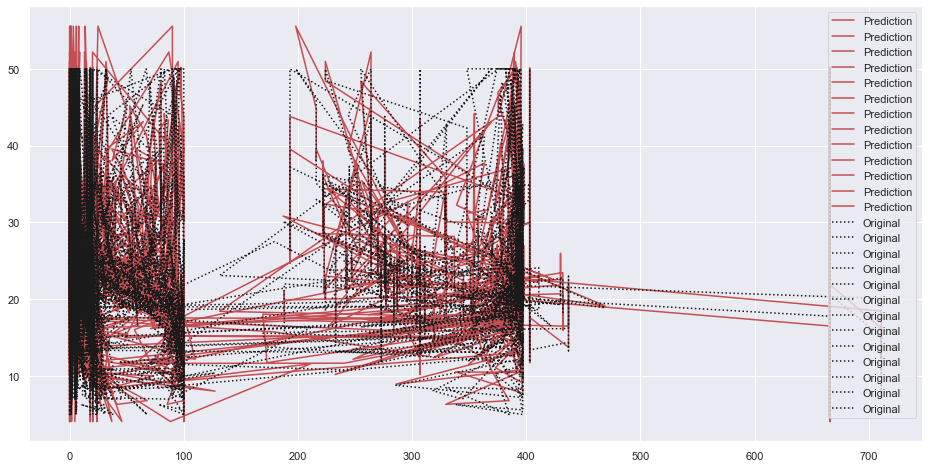

In [35]:
# Plot the values
plt.plot(x,p, 'r-', label='Prediction')
plt.plot(x,y, 'k:', label='Original')
plt.legend()

In [24]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


At this point, instead of trying to look for technical solutions to this issue it is time to return to the statistical ground and try to improve the model using some logical thinking and old-fashioned statistician's mind.

Neural networks are working in the same semantic field as classical regression models and multivariant paradigms. In these models, before computational power made possible the degree of trial and error displayed in this notebook, scarcity of resources led researchers and students to a more toughtful decision-making process before trying to create and test a predictive model.

Applying these same principles to the present investigation, intuition says the the inclusion of all the variables present in the data set might have been somehow precipitate.

As [this Medium article](https://medium.com/@thevie/predicting-boston-housing-prices-step-by-step-linear-regression-tutorial-from-scratch-in-python-c50a09b70b22) explains, the decision of including and excluding variables to the predictive model is important since it might be the difference between creating an accurate model and other with so much noise produced by non-important variables that its predictions are blurred.

According to the Least Squares Assumptions, predictors included in a regression model should be highly correlated with the target and also not highly correlated between them. They should individually be able to explain a significant part of the target's variance but remain independent from each other.

A good way to test this with our data is to run a correlation matrix:

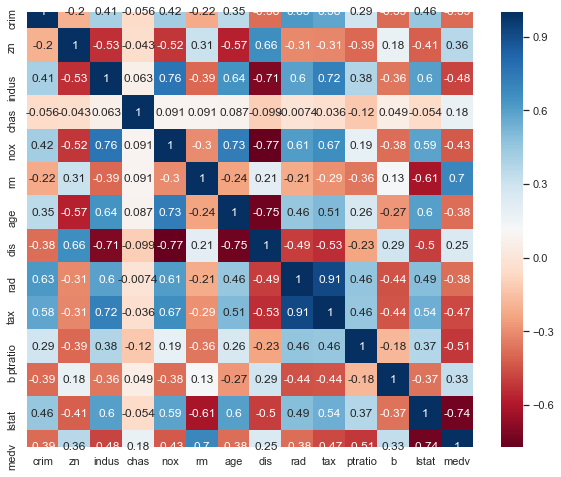

In [100]:
ax.fig = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='RdBu')

From the bove results it is obvious that most of the features do not have any predictive power over the target and thus, should be rejected into the predictive model.